# Clustering de documents

## Imports

In [15]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [16]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1910'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [89]:
# Exemple de fichiers
files[:5]

['Bxl_1910_Tome_I1_Part_1.txt',
 'Bxl_1910_Tome_I1_Part_2.txt',
 'Bxl_1910_Tome_I1_Part_3.txt',
 'Bxl_1910_Tome_I1_Part_4.txt',
 'Bxl_1910_Tome_I1_Part_5.txt']

In [7]:
texts = [open(data_path + f).read() for f in files]

In [8]:
# Exemple de textes
texts[20][:400]

'— 797 —\nLa répartition des décès par â g e donne :\n0 à 15 jours, 2 ; 16 à 30 jours, 2 ; 1 à 3 mois, 4 ; 4 à 6 mois, 9 ;\n7 à 12 mois, 31 ; 1 à 2 ans, 40 ; 3 à 5 ans, 18 ; 6 à 10 ans, 4 ;\n20 à 30 ans, 2; 31 à 35 ans, 2 ; 36 à 40 ans, 3 ; 41 à 45 ans, 4 ;\n46 à 50 ans, 5 ; 51 à 55 ans, 3 ; 56 à 60 ans, 5 ; 61 à 65 ans, 15;\n66.à 70 ans, 12 ;. 71 à 75 ans, 15 ; 76 à 80 ans, 18 ; 81 à 85\nans, 16; 8 6 à 9'

### Explore

In [90]:
len(files)

170

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 1min 7s, sys: 0 ns, total: 1min 7s
Wall time: 1min 7s


In [12]:
# Détail de la matrice
tfidf_vectors

<170x7097 sparse matrix of type '<class 'numpy.float64'>'
	with 252381 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

enseignant          0.194609
perfectionnement    0.160739
theodor             0.151363
l'honorable         0.140094
sacrés              0.129844
                      ...   
dit-il              0.000000
distribués          0.000000
distribuées         0.000000
distribué           0.000000
™                   0.000000
Length: 7097, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [14]:
cosine([1, 2, 3], [1, 2, 3])

0

In [15]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [16]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [17]:
tfidf_array = tfidf_vectors.toarray()

In [18]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.01001937, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [20]:
cosine(tfidf_array[0], tfidf_array[1])

0.712899401391456

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [79]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [80]:
km_model = KMeans(n_clusters=N_CLUSTERS, random_state=20)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [81]:
clusters = km_model.fit_predict(tfidf_vectors)

In [82]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [75]:
pprint(dict(clustering))

{0: ['Bxl_1910_Tome_I2_1_Part_13.txt',
     'Bxl_1910_Tome_I2_1_Part_2.txt',
     'Bxl_1910_Tome_I2_1_Part_3.txt',
     'Bxl_1910_Tome_I2_2_Part_1.txt',
     'Bxl_1910_Tome_I2_2_Part_11.txt',
     'Bxl_1911_Tome_I1_Part_2.txt',
     'Bxl_1911_Tome_I1_Part_3.txt',
     'Bxl_1911_Tome_I1_Part_4.txt',
     'Bxl_1911_Tome_I1_Part_7.txt',
     'Bxl_1911_Tome_I2_2_Part_2.txt',
     'Bxl_1911_Tome_I2_2_Part_3.txt',
     'Bxl_1911_Tome_II1_Part_4.txt',
     'Bxl_1912_Tome_I1_1_Part_3.txt',
     'Bxl_1912_Tome_I1_2_Part_1.txt',
     'Bxl_1912_Tome_I1_2_Part_2.txt',
     'Bxl_1912_Tome_I1_2_Part_3.txt',
     'Bxl_1912_Tome_I2_2_Part_1.txt',
     'Bxl_1912_Tome_I2_2_Part_2.txt',
     'Bxl_1912_Tome_I2_2_Part_8.txt',
     'Bxl_1913_Tome_I1_Part_12.txt',
     'Bxl_1913_Tome_I1_Part_7.txt',
     'Bxl_1913_Tome_I1_Part_8.txt',
     'Bxl_1913_Tome_I1_Part_9.txt',
     'Bxl_1913_Tome_I2_2_Part_1.txt',
     'Bxl_1913_Tome_I2_2_Part_10.txt',
     'Bxl_1913_Tome_I2_2_Part_11.txt',
     'Bxl_1913_Tome_II1_

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [83]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [84]:
reduced_vectors[:10]

array([[-0.29560774,  0.02954809],
       [-0.21130131,  0.00855998],
       [-0.07380143, -0.02821183],
       [-0.31097145,  0.09738038],
       [-0.17718308,  0.04695232],
       [-0.3250453 ,  0.11745266],
       [-0.13381007,  0.00420081],
       [ 0.08315591, -0.07106021],
       [-0.23319753, -0.02372703],
       [ 0.15930393, -0.11000436]])

### Générer le plot

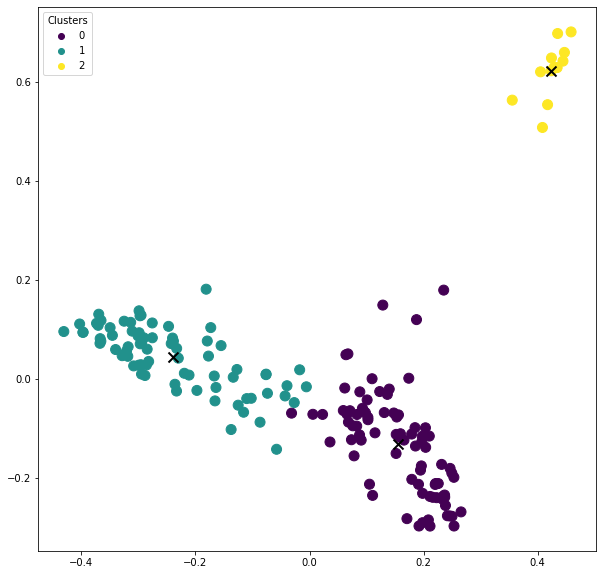

In [85]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

In [ ]:
# Word Embeddings : le modèle Word2Vec

## Chargement et traitement des phrases du corpus

### Création d'un objet qui *streame* les lignes d'un fichier pour économiser de la RAM

In [17]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [29]:
infile = f"../data/sents.txt"
sentences = MySentences(infile)

### Détection des bigrams

In [20]:
bigram_phrases = Phrases(sentences)

In [21]:
type(bigram_phrases.vocab)

dict

Il contient de nombreuses clés qui sont autant de termes observés dans le corpus

In [35]:
len(bigram_phrases.vocab.keys())

5978799

Prenons une clé au hasard :

In [36]:
key_ = list(bigram_phrases.vocab.keys())[200]
print(key_)

de_leur



Le dictionnaire indique le score de cette coocurrence :

In [37]:
bigram_phrases.vocab[key_]

12688

Lorsque l'instance de Phrases a été entraînée, elle peut concaténer les bigrams dans les phrases lorsque c'est pertinent.

### Conversion des `Phrases` en objet `Phraser`

`Phraser` est un alias pour `gensim.models.phrases.FrozenPhrases`, voir ici https://radimrehurek.com/gensim/models/phrases.html.

Le `Phraser` est une version *light* du `Phrases`, plus optimale pour transformer les phrases en concaténant les bigrams.

In [38]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

Le `Phraser` est un objet qui convertit certains unigrams d'une liste en bigrams lorsqu'ils ont été identifiés comme pertinents.

### Extraction des trigrams

Nous répétons l'opération en envoyant cette fois la liste de bigrams afin d'extraire les trigrams.

In [41]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [43]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

### Création d'un corpus d'unigrams, bigrams, trigrams

In [44]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [45]:
print(corpus[:100])

[['v', 'i', 'l', 'l', 'e', 'de', 'bruxelles', 'bulletin', 'ires', '8eanas', 'dl', '!'], ['conseil_communal', 'annee', '1847', '.'], ['au', 'ville', 'de', 'b', 'r', 'u', 'x', 'e', 'l', 'l', 'e', 's', '.'], ['bulletin', 'conseil', 'aes', 'seances', 'communal', '.'], ['annee', '1847', '.'], ['bruxelles', ',', 'imprimerie', 'd', 'e', 'j', '.'], ['h', '.', 'b', 'r', 'i', 'a', 'r', 'd', ',', 'rite', 'n', 'e', 'u', 'v', 'e', ',', '3', '1', ',', 'faubourg', 'de', 'n', 'a', 'm', 'u', 'r', ',', '1', '84', '8', 'de', '!'], ['du', 'consei', 'dibi', 'e', '.', '-', 'communication', 'conclusions', 'de', 'la', 'section', 'des', 'du', 'nouvel_hospice', 'pour', 'les', 'av', 'enraisonde', 'l', "'", 'absence', '&', 'maladie', '.', 'le', 'conseil', 'ajourne', 'leurs', 'de', 'pierre', 'el', 'marchai', 'cles', 'des', 'taxes', 'communale', "'", 'bieniaance', 'eldeseianv', 'il', 'est', 'donne', 'communie', ';', 'mandant', 'le', 'o', 'p', 'fa', 'gnant', 'l', "'", 'envoi', 'de', 'leur', 'bn', 'par', 'l', "'", 'e

## Entrainement d'un modèle Word2Vec sur ce corpus

In [46]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descende de gradient, aka. epochs.
)

CPU times: user 15min 6s, sys: 17.4 s, total: 15min 23s
Wall time: 6min 58s


### Sauver le modèle dans un fichier

In [49]:
outfile = f"../data/bulletins.model"
model.save(outfile)

## Explorer le modèle

### Charger le modèle en mémoire

In [ ]:
model = Word2Vec.load("../data/bulletins.model")

### Calculer la similarité entre deux termes

In [99]:
model.wv.similarity("wallonie", "flandre")

0.4240507

In [100]:
model.wv.similarity("belgique", "france")

0.74094605

In [101]:
model.wv.similarity("flamande", "wallon")

0.3102181

In [102]:
model.wv.similarity("culture", "education")

0.18566157

In [104]:
model.wv.similarity("culture", "sante")

0.48786104

In [105]:
model.wv.similarity("culture", "loisir")

-0.056686953

In [106]:
model.wv.similarity("budget", "depense")

0.37098712

In [107]:
model.wv.similarity("budget", "frais")

-0.034199487

In [108]:
model.wv.similarity("guerre", "perte")

0.47797996

### Chercher les mots les plus proches d'un terme donné

In [110]:
model.wv.most_similar("flandre", topn=10)

[('namur', 0.8403913378715515),
 ('toulouse', 0.8238779306411743),
 ('waterloo', 0.8132191300392151),
 ('ninove', 0.8119989037513733),
 ('hal', 0.8098856210708618),
 ('cortenbergh', 0.8015639185905457),
 ('hai', 0.800775945186615),
 ('tervueren', 0.7997057437896729),
 ('treves', 0.7921829223632812),
 ('louvain', 0.7883301973342896)]

In [111]:
model.wv.most_similar("flandres", topn=10)

[('ardennes', 0.9163593649864197),
 ('refugies', 0.910923957824707),
 ('camps', 0.8956367373466492),
 ('cantons', 0.8825440406799316),
 ('quartiers_populaires', 0.8751136660575867),
 ('villages', 0.8694430589675903),
 ('villes', 0.8626969456672668),
 ('armees', 0.8578890562057495),
 ('arrondissements', 0.856347918510437),
 ('allemands', 0.8542149662971497)]

In [114]:
model.wv.most_similar("flamande", topn=10)

[('francaise', 0.8931405544281006),
 ('anglaise', 0.86311274766922),
 ('espagnole', 0.849955677986145),
 ('wallonne', 0.8452131152153015),
 ('commerciale', 0.8403035402297974),
 ('sportive', 0.8331328630447388),
 ('musicale', 0.8243574500083923),
 ('allemande', 0.8116617202758789),
 ('coloniale', 0.7970178723335266),
 ('grecque', 0.7938052415847778)]

In [112]:
model.wv.most_similar("wallonie", topn=10)

[('russie', 0.8646996021270752),
 ('france', 0.8331219553947449),
 ('pologne', 0.8140416741371155),
 ('plein_centre', 0.7948052883148193),
 ('hollande', 0.7941307425498962),
 ('grece', 0.7831395268440247),
 ('londres', 0.7819761633872986),
 ('milan', 0.7735450863838196),
 ('allemagne', 0.7676587104797363),
 ('suede', 0.7649011015892029)]

In [113]:
model.wv.most_similar("wallon", topn=10)

[('charmant', 0.8654361367225647),
 ('patriote', 0.8582382798194885),
 ('folklorique', 0.8523140549659729),
 ('ardent', 0.8520454168319702),
 ('brave', 0.8480530977249146),
 ('createur', 0.8473471403121948),
 ('vaillant', 0.8398764133453369),
 ('poete', 0.8316842913627625),
 ('pittoresque', 0.8221735954284668),
 ('universel', 0.8212655782699585)]

In [115]:
model.wv.most_similar("culture", topn=10)

[('corporation', 0.7998597025871277),
 ('resistance', 0.7849059700965881),
 ('beaute', 0.780036449432373),
 ('dispersion', 0.779205858707428),
 ('conservation', 0.7662532329559326),
 ('variete', 0.7658042311668396),
 ('multiplicite', 0.763769805431366),
 ('abondance', 0.7615370154380798),
 ('destruction', 0.7585723400115967),
 ('provenance', 0.7545466423034668)]

In [116]:
model.wv.most_similar("education", topn=10)

[('ecole_normale', 0.8116359710693359),
 ('education_physique', 0.8089597821235657),
 ('orthophonie', 0.8047803044319153),
 ('ecole_normale_charles_buis', 0.7926889061927795),
 ('enseignement_professionnel', 0.7841461896896362),
 ('ecole_normale_emile_andre', 0.7812212109565735),
 ('ecole_industrielle', 0.7692628502845764),
 ('ecole_bischoffsheim', 0.7686640620231628),
 ('ecole', 0.7673534750938416),
 ('enseignement_technique', 0.7655732035636902)]

In [117]:
model.wv.most_similar("sante", topn=10)

[('religion', 0.7356807589530945),
 ('selection', 0.6984449028968811),
 ('readaptation', 0.6906875967979431),
 ('maladie', 0.6869207620620728),
 ('proprete', 0.683218777179718),
 ('promotion', 0.6789828538894653),
 ('reeducation', 0.6769979000091553),
 ('frequentation', 0.6716240048408508),
 ('population', 0.6659720540046692),
 ('remuneration', 0.6652318835258484)]

In [118]:
model.wv.most_similar("transport", topn=10)

[('dechargement', 0.8288240432739258),
 ('rebut', 0.8184958696365356),
 ('chargement', 0.8139699101448059),
 ('balayage', 0.8052038550376892),
 ('remisage', 0.8005496859550476),
 ('debarquement', 0.797757625579834),
 ('parcage', 0.7940680980682373),
 ('garage', 0.7897650599479675),
 ('poids', 0.7790351510047913),
 ('charbon', 0.7718831896781921)]

### Faire des recherches complexes à travers l'espace vectoriel

In [119]:
print(model.wv.most_similar(positive=['wallonie', 'belgique'], negative=['bruxelles']))

[('france', 0.7596578598022461), ('matiere_linguistique', 0.7304070591926575), ('walkyrie', 0.7259715795516968), ('voyageant', 0.7232097387313843), ('prose', 0.7194555997848511), ('hollande', 0.7188662886619568), ('plein_centre', 0.7044429183006287), ('bas_age', 0.6997612118721008), ('abrege', 0.6982136964797974), ('guise', 0.6971213817596436)]


In [121]:
print(model.wv.most_similar(positive=['bruxelles', 'belgique'], negative=['wallonie']))

[('nivelles', 0.6521661281585693), ('rhotel', 0.650702953338623), ('arrondissement', 0.6462843418121338), ('suicides_superficie', 0.6242458820343018), ('canton', 0.6234377026557922), ('patronage', 0.6228439211845398), ('la_part_contributive', 0.6043516993522644), ('societe_generale', 0.6009778380393982), ('laeken', 0.5957237482070923), ('caissier', 0.5863300561904907)]


In [120]:
print(model.wv.most_similar(positive=['culture', 'sante'], negative=['france']))

[('proprete', 0.7641989588737488), ('penurie', 0.7540736198425293), ('stabilite', 0.749561071395874), ('conservation', 0.7417721152305603), ('frequentation', 0.7391798496246338), ('surveillance', 0.7274792790412903), ('securite', 0.7198324799537659), ('masse', 0.7185702323913574), ('remuneration', 0.717300295829773), ('bonne_tenue', 0.7136844396591187)]
